# Modelos de Classificação Supervisionados

Versão Python:

In [1]:
from platform import python_version
print("Versão de Python: ", python_version())

Versão de Python:  3.9.13


Livrarias:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Desafio

- Considera-se o conjunto de dados de $400$ clientes de uma empresa de carro. Cada paciente é categorizado de acordo com sua condição de compra ($0$ para "não comprou" e $4$ para "comprou").

- Busca-se desenvolver um sistema capaz de prever as compras de futuros clientes com base em nove ($2$) características específicas.

## Dados

In [3]:
data_set = pd.read_csv("Social_Network_Ads.csv")

In [4]:
# Cabeçalho de dados
data_set.head(n = 10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


In [5]:
# estrutura de dados 
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


## Descritiva

Resumo descritivo: 

In [6]:
data_set[["Age", "EstimatedSalary"]].describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,37.655000,69742.500000
std,10.482877,34096.960282
min,18.000000,15000.000000
25%,29.750000,43000.000000
50%,37.000000,70000.000000
75%,46.000000,88000.000000
max,60.000000,150000.000000


Box-plot:

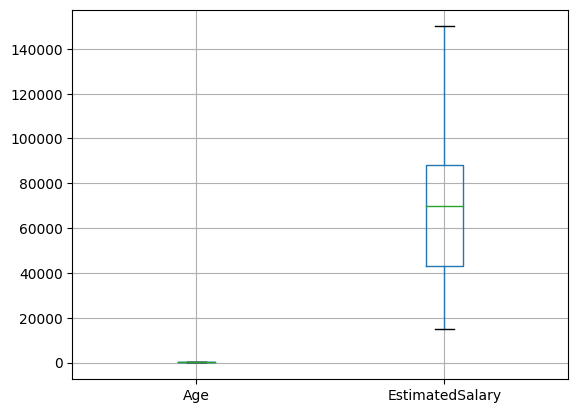

In [7]:
data_set[["Age", "EstimatedSalary"]].boxplot()
plt.show()

Histograma: 

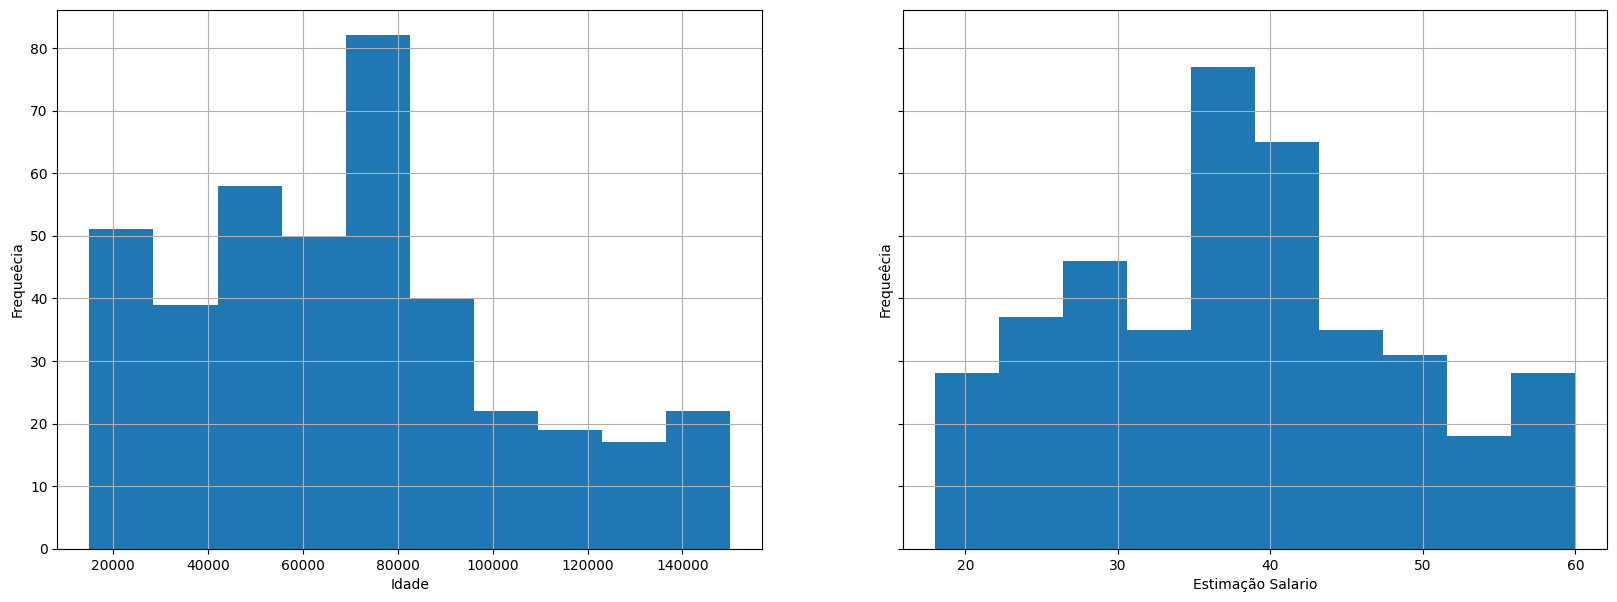

In [8]:
fig, axs = plt.subplots(1, 2, figsize = (20, 7), sharey=True)
data_set["EstimatedSalary"].hist(ax = axs[0])
data_set["Age"].hist(ax = axs[1])
axs[0].set_xlabel("Idade")
axs[1].set_xlabel("Estimação Salario")
axs[0].set_ylabel("Frequeêcia")
axs[1].set_ylabel("Frequeêcia")
plt.show()

Prevalência na variável resposta:

In [9]:
data_set[["Purchased"]].value_counts()

Purchased
0            257
1            143
dtype: int64

Correlação:

In [10]:
data_set.corr().round(2)

,Age,EstimatedSalary,Purchased
Age,1.00,0.16,0.62
EstimatedSalary,0.16,1.00,0.36
Purchased,0.62,0.36,1.00


Gráfico de dispersão: 

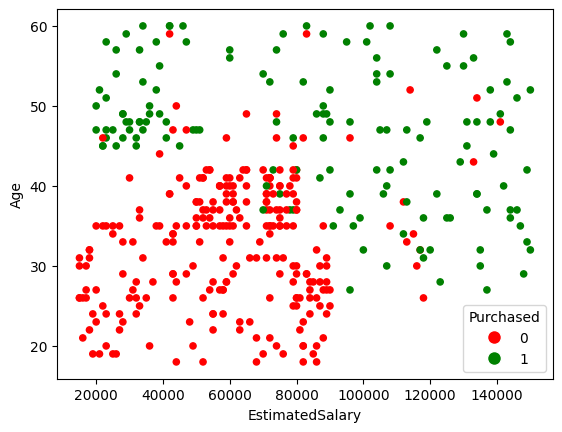

In [11]:
colour = np.where(data_set["Purchased"].values == 0, "red", "green")
data_set.plot.scatter(x = "EstimatedSalary", y = "Age", c = colour)
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='0'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='1')],
           title='Purchased', loc='lower right')
plt.show()

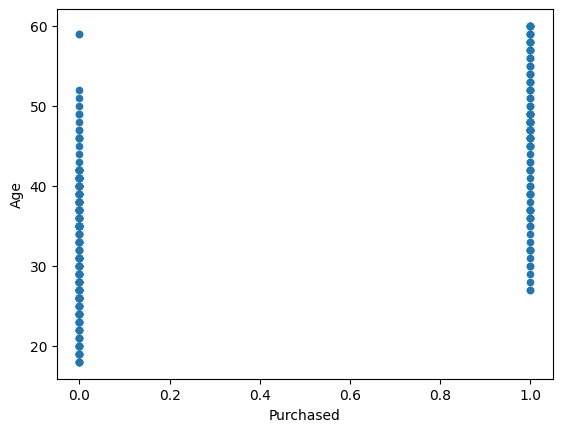

In [12]:
data_set.plot.scatter(x = "Purchased", y = "Age")
plt.show()

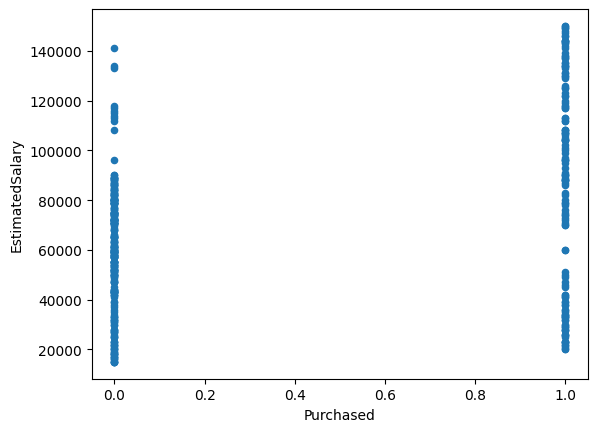

In [13]:
data_set.plot.scatter(x = "Purchased", y = "EstimatedSalary")
plt.show()

Considerações: 
- Padronizar as variáveis `Age` e `EstimatedSalary`. 
- Discretizar a variável `Purchased`. 
- Existe prevalênca nos clientes que não compraram carros, dados desequilibrados.
- Em idades cerca de $35$ e $47$ os salarios parecem ter uma fixação. 
- Parece que os clientes com maior idades e salário foram os que maiormente comparaam o automóvel. 

## Conjunto Treinamento e Teste

Recursos e target:

In [14]:
X = data_set.copy()[["Age", "EstimatedSalary"]]
y = data_set.copy()[["Purchased"]]

Dividir conjuntos: 

In [15]:
from sklearn.model_selection import train_test_split 

In [16]:
X_train, X_test = train_test_split(X, test_size = 0.25, stratify = X.iloc[:, 0], random_state = 42)
y_train, y_test = train_test_split(y, test_size = 0.25, stratify = X.iloc[:, 0], random_state = 42)

## Pré-processamento

In [17]:
# Copia de conjunto de treinamento
X_train_copy = X_train.copy()
y_train_copy = y_train.copy()

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

In [19]:
#  Variável `Age` e `EstimatedSalary`: Imputar, transformação log, padronizar.
num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                              FunctionTransformer(np.log, feature_names_out="one-to-one"),
                              StandardScaler())

# pré-processamento
pre_processamento = ColumnTransformer([
    ("log", num_pipeline, [0, 1])
])


In [20]:
# executar pré_processamento
X_train_proce = pd.DataFrame(data = pre_processamento.fit_transform(X_train_copy), 
                      columns = pre_processamento.get_feature_names_out(),
                      dtype = np.float32)

X_train_proce

,log__Age,log__EstimatedSalary
0,0.915687,-1.012509
1,1.329637,1.539539
2,0.765862,-1.489106
3,0.091437,0.462682
4,-1.124186,-0.257665
...,...,...
295,0.360049,0.393003
296,-0.408778,-2.142403
297,-0.408778,1.437261
298,0.360049,0.138771


In [21]:
# codificar variável de resposta
le = LabelEncoder()
y_train_encod = le.fit_transform(y_train_copy.values.ravel())

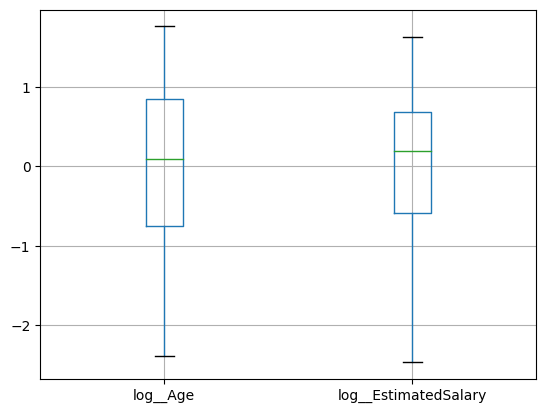

In [22]:
# Verificação 
X_train_proce.boxplot()
plt.show()

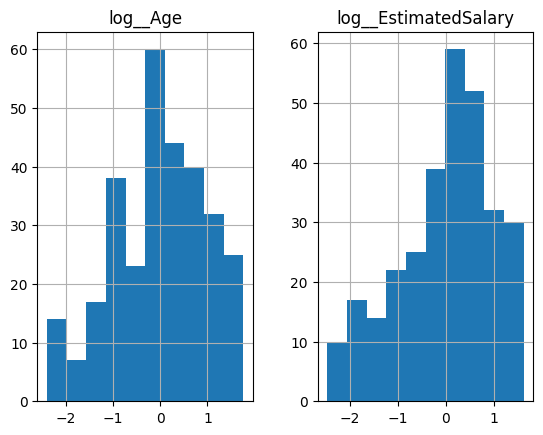

In [23]:
X_train_proce.hist()
plt.show()

## Selecionar e Treinar um Modelo

Para selecionar um modelo de calculam as métricas de avaliação através de métodos de validação cruzada com busca aleatrória (`RandomizedSearchCV`).

#### Modelo de Regressão Logística: 

In [24]:
from sklearn.linear_model import LogisticRegression
lin_logistic = make_pipeline(pre_processamento, LogisticRegression())
lin_logistic.fit(X_train_copy, y_train_encod)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  [0, 1])])),
                ('logisticregression', LogisticRegression())])

#### Modelo K-Nearest Neighbors (K-NN)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
class_neigh = make_pipeline(pre_processamento,
                            KNeighborsClassifier(n_neighbors = 5, p = 2, metric = "minkowski"))
class_neigh.fit(X_train_copy, y_train_encod)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  [0, 1])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

#### Modelo SVM Linear

- Este modelo pode não ser apropriado devido a que os dados não são separáveis linearmente. Mas para efeitos de ensino, se  faz o ajuste.

In [26]:
from sklearn.svm import SVC
class_svm = make_pipeline(pre_processamento, SVC(kernel = "linear", random_state = 42))
class_svm.fit(X_train_copy, y_train_encod)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  [0, 1])])),
                ('svc', SVC(kernel='linear', random_state=42))])

#### Modelo SVM Não Linear

In [27]:
from sklearn.svm import SVC
class_svm_rbf = make_pipeline(pre_processamento, SVC(kernel = "rbf", random_state = 42))
class_svm_rbf.fit(X_train_copy, y_train_encod)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  [0, 1])])),
                ('svc', SVC(random_state=42))])

In [28]:
from sklearn.svm import SVC
class_svm_poly = make_pipeline(pre_processamento, SVC(kernel = "poly", random_state = 42))
class_svm_poly.fit(X_train_copy, y_train_encod)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  [0, 1])])),
                ('svc', SVC(kernel='poly', random_state=42))])

In [29]:
from sklearn.svm import SVC
class_svm_sigmoid = make_pipeline(pre_processamento, SVC(kernel = "sigmoid", random_state = 42))
class_svm_sigmoid.fit(X_train_copy, y_train_encod)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  [0, 1])])),
                ('svc', SVC(kernel='sigmoid', random_state=42))])

#### Modelo Naives Bayes

- Apresenta o suposto que as caraterísticas $(X_1, X_2, \cdots, X_n)$ são independêntes. 
- Neste caso, o suposto é violado mesmo assim é aplicado por motivos de ensino e tentar encontrar alguma vantagem. 

In [30]:
from sklearn.naive_bayes import GaussianNB
class_bayes_gauss = make_pipeline(pre_processamento, GaussianNB())
class_bayes_gauss.fit(X_train_copy, y_train_encod)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  [0, 1])])),
                ('gaussiannb', GaussianNB())])

#### Modelo de Classificação de  Arvore de Desição 

- Este modelo é muito velho, não são muito poderosos e simples pelo que seu uso está morrendo.
- Tive um renacimento, sendo a base de outros modelos aproveitam sua simplicidade e são mais poderosos. 

In [31]:
from sklearn.tree import DecisionTreeClassifier
class_dtree = make_pipeline(pre_processamento, DecisionTreeClassifier(criterion="entropy", random_state=42))
class_dtree.fit(X_train_copy, y_train_encod)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  [0, 1])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', random_state=42))])

#### Modelo de Classificação de Foresta Aleatória 

Portanto, a Floresta Aleatória é um exemplo de aprendizado conjunto homogêneo (`Same Type Ensemble`), pois é composta por várias árvores de decisão. Cada árvore é treinada de forma independente, e suas previsões são combinadas (geralmente por voto majoritário no caso de classificação ou média no caso de regressão) para formar a previsão final do modelo. Essa abordagem ajuda a reduzir a variância do modelo e a melhorar o desempenho geral, tornando a Floresta Aleatória uma escolha popular em muitas tarefas de aprendizado de máquina..

In [32]:
from sklearn.ensemble import RandomForestClassifier
class_forest = make_pipeline(pre_processamento, RandomForestClassifier(n_estimators = 100, criterion = "entropy", random_state = 42))
class_forest.fit(X_train_copy, y_train_encod)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  [0, 1])])),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', random_state=42))])

Medidas de Precisão:

- Usando Validação Cruzada (CV): Requer um tempo computacional proporcional ao número de *k - fold* escolhidos para analises. Não existe uma regra para a seleção dos *k - fold* mas escolhas tipicas são $5$ ou $10$. Resulta conveniente quando o tamnho do conjunto de treinamento for menor do que $1.000$. 

- Usando Bootstrap: tende a haver menos variabilidade na medida do erro em comparação com o CV k-fold (Efron, 1983). No entanto, isso também pode aumentar o viés da sua estimativa de erro. Isto pode ser problemático com conjuntos de dados menores; no entanto, para a maioria dos conjuntos de dados médios a grandes (digamos 𝑛 ≥ 1.000) essa preocupação geralmente é insignificante. Sendo conveniente quando o conjunto de treinamento for maior ou igual a $1.000$.

- Aqui se tem um tamanho de conjunto de treinamento de $400$, assim se realizam as medidas de precisão através de *cv* com $k = 5$, i.e, um $20 \%$ do conjunto para avaliação:

In [33]:
# Previsão usando valodação cruzada
from sklearn.model_selection import cross_val_predict
y_train_pred_logic = cross_val_predict(lin_logistic, X_train_copy, y_train_encod, cv = 5)
y_train_pred_neigh = cross_val_predict(class_neigh, X_train_copy, y_train_encod, cv = 5) 
y_train_pred_svm  = cross_val_predict(class_svm, X_train_copy, y_train_encod, cv = 5) 
y_train_pred_svm_rbf  = cross_val_predict(class_svm_rbf, X_train_copy, y_train_encod, cv = 5) 
y_train_pred_svm_poly  = cross_val_predict(class_svm_poly, X_train_copy, y_train_encod, cv = 5) 
y_train_pred_svm_sigmoid  = cross_val_predict(class_svm_sigmoid, X_train_copy, y_train_encod, cv = 5) 
y_train_pred_bayes_gauss = cross_val_predict(class_bayes_gauss, X_train_copy, y_train_encod, cv = 5) 
y_train_pred_dtree = cross_val_predict(class_dtree, X_train_copy, y_train_encod, cv = 5)
y_train_pred_forest = cross_val_predict(class_forest, X_train_copy, y_train_encod, cv = 5)

In [34]:
from sklearn.metrics import mean_squared_error, confusion_matrix, roc_curve, precision_recall_curve, f1_score

In [35]:
# Matriz de confusão usando CV
logic_cm = confusion_matrix(y_train_encod, y_train_pred_logic)
neigh_cm = confusion_matrix(y_train_encod, y_train_pred_neigh)
svm_cm = confusion_matrix(y_train_encod, y_train_pred_svm)
svm_rbf_cm = confusion_matrix(y_train_encod, y_train_pred_svm_rbf)
svm_poly_cm = confusion_matrix(y_train_encod, y_train_pred_svm_poly)
svm_sigmoid_cm = confusion_matrix(y_train_encod, y_train_pred_svm_sigmoid)
bayes_cm = confusion_matrix(y_train_encod, y_train_pred_bayes_gauss)
dtree_cm = confusion_matrix(y_train_encod, y_train_pred_dtree)
forest_cm = confusion_matrix(y_train_encod, y_train_pred_forest)

print("Matriz de confusão do Linear Logística:"); print(logic_cm)
print("Matriz de confusão do KNN:"); print(neigh_cm)
print("Matriz de confusão do SVM Kernel Linear:"); print(svm_cm)
print("Matriz de confusão do SVM Kernel rbf:"); print(svm_rbf_cm)
print("Matriz de confusão do SVM Kernel poly:"); print(svm_poly_cm)
print("Matriz de confusão do SVM Kernel sigmoid:"); print(svm_sigmoid_cm)
print("Matriz de confusão do Naive Bayes:"); print(bayes_cm)
print("Matriz de confusão do Classification Tree:"); print(dtree_cm)
print("Matriz de confusão do Classification Random Forest:"); print(forest_cm)

Matriz de confusão do Linear Logística:
[[165  25]
 [ 31  79]]
Matriz de confusão do KNN:
[[173  17]
 [ 16  94]]
Matriz de confusão do SVM Kernel Linear:
[[168  22]
 [ 30  80]]
Matriz de confusão do SVM Kernel rbf:
[[173  17]
 [ 12  98]]
Matriz de confusão do SVM Kernel poly:
[[183   7]
 [ 30  80]]
Matriz de confusão do SVM Kernel sigmoid:
[[141  49]
 [ 54  56]]
Matriz de confusão do Naive Bayes:
[[165  25]
 [ 20  90]]
Matriz de confusão do Classification Tree:
[[169  21]
 [ 14  96]]
Matriz de confusão do Classification Random Forest:
[[173  17]
 [ 13  97]]


Curva ROC (Recall vs TFP) e Curva PR (Presição/Recall):

- Como regra geral, se deve preferir a curva PR sempre que a classe positiva for rara (pouca frequência) ou quando você se importar mais com os falsos positivos do que com os falsos negativos. Caso contrário, use a curva ROC.

- Para este caso se quer disminuir o número de falsos positivos, devido que a campanha de marketing vai ser em aqueles clientes que compraram os automóveis. Se calcula a curva ROC para aprendizado. 

In [36]:
# Função score
y_scores_logic = cross_val_predict(lin_logistic, X_train_copy, y_train_encod, cv = 5, method = "decision_function")

model_neigh = class_neigh.named_steps["kneighborsclassifier"]
distance_neigh, distance_ind = model_neigh.kneighbors(X_train_copy.values)
y_scores_neigh = distance_neigh.mean(axis=1)

y_scores_svm = cross_val_predict(class_svm, X_train_copy, y_train_encod, cv = 5, method = "decision_function")
y_scores_svm_rbf = cross_val_predict(class_svm_rbf, X_train_copy, y_train_encod, cv = 5, method = "decision_function")
y_scores_svm_poly = cross_val_predict(class_svm_poly, X_train_copy, y_train_encod, cv = 5, method = "decision_function")
y_scores_svm_sigmoid = cross_val_predict(class_svm_sigmoid, X_train_copy, y_train_encod, cv = 5, method = "decision_function")

y_scores_bayes_gauss = cross_val_predict(class_bayes_gauss, X_train_copy, y_train_encod, cv = 5, method = "predict_proba")
y_scores_bayes_gauss = y_scores_bayes_gauss.max(axis = 1)

y_scores_dtree = cross_val_predict(class_dtree, X_train_copy, y_train_encod, cv = 5, method = "predict_proba")
y_scores_forest = cross_val_predict(class_forest, X_train_copy, y_train_encod, cv = 5, method = "predict_proba")

In [37]:
# Curva PR usando CV
precisions_logic, recalls_logic, thresholds_logic = precision_recall_curve(y_train_encod, y_scores_logic)
precisions_neigh, recalls_neigh, thresholds_neigh = precision_recall_curve(y_train_encod, y_scores_neigh)

precisions_svm, recalls_svm, thresholds_svm = precision_recall_curve(y_train_encod, y_scores_svm)
precisions_svm_rbf, recalls_svm_rbf, thresholds_svm_rbf = precision_recall_curve(y_train_encod, y_scores_svm_rbf)
precisions_svm_poly, recalls_svm_poly, thresholds_svm_poly = precision_recall_curve(y_train_encod, y_scores_svm_poly)
precisions_svm_sigmoid, recalls_svm_sigmoid, thresholds_svm_sigmoid = precision_recall_curve(y_train_encod, y_scores_svm_sigmoid)

precisions_bayes, recalls_bayes, thresholds_bayes = precision_recall_curve(y_train_encod, y_scores_bayes_gauss)
precisions_dtree, recalls_dtree, thresholds_dtree = precision_recall_curve(y_train_encod, y_scores_dtree.max(axis = 1))
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_encod, y_scores_forest.max(axis = 1))

In [38]:
# difinindo o limear para uma presição maior ou igual ao 90% 
idx_for_90_precision_logic = (precisions_logic >= 0.90).argmax()
threshold_for_90_precision_logic = thresholds_logic[idx_for_90_precision_logic]
print("Limear de classificação do Logistic:", threshold_for_90_precision_logic.round(2))
print("-----------------------------")
print("Recall para a Precisão de 0.9 requerida do Logistic:", recalls_logic[idx_for_90_precision_logic].round(2))

Limear de classificação do Logistic: 1.16
-----------------------------
Recall para a Precisão de 0.9 requerida do Logistic: 0.41


In [39]:
idx_for_90_precision_neigh = (precisions_neigh >= 0.90).argmax()
threshold_for_90_precision_neigh = thresholds_neigh[idx_for_90_precision_neigh]
print("Limear de classificação do Knn:", threshold_for_90_precision_neigh.round(2))
print("-----------------------------")
print("Recall para a Precisão de 0.9 requerida do Knn:", recalls_neigh[idx_for_90_precision_neigh].round(2))

Limear de classificação do Knn: 116998.4
-----------------------------
Recall para a Precisão de 0.9 requerida do Knn: 0.29


In [40]:
idx_for_90_precision_svm = (precisions_svm >= 0.90).argmax()
threshold_for_90_precision_svm = thresholds_svm[idx_for_90_precision_svm]
print("Limear de classificação do SVM Linear:", threshold_for_90_precision_svm.round(2))
print("-----------------------------")
print("Recall para a Precisão de 0.9 requerida do SVM Kernel Linear:", recalls_svm[idx_for_90_precision_svm].round(2))

Limear de classificação do SVM Linear: 0.94
-----------------------------
Recall para a Precisão de 0.9 requerida do SVM Kernel Linear: 0.42


In [41]:
idx_for_90_precision_svm_rbf = (precisions_svm_rbf >= 0.90).argmax()
threshold_for_90_precision_svm_rbf = thresholds_svm[idx_for_90_precision_svm_rbf]
print("Limear de classificação do SVM rbf:", threshold_for_90_precision_svm_rbf.round(2))
print("-----------------------------")
print("Recall para a Precisão de 0.9 requerida do SVM Kernel rbf:", recalls_svm_rbf[idx_for_90_precision_svm_rbf].round(2))

Limear de classificação do SVM rbf: 0.05
-----------------------------
Recall para a Precisão de 0.9 requerida do SVM Kernel rbf: 0.82


In [42]:
idx_for_90_precision_svm_poly = (precisions_svm_poly >= 0.90).argmax()
threshold_for_90_precision_svm_poly = thresholds_svm_poly[idx_for_90_precision_svm_poly]
print("Limear de classificação do SVM poly:", threshold_for_90_precision_svm_poly.round(2))
print("-----------------------------")
print("Recall para a Precisão de 0.9 requerida do SVM Kernel poly:", recalls_svm_poly[idx_for_90_precision_svm_poly].round(2))

Limear de classificação do SVM poly: -0.26
-----------------------------
Recall para a Precisão de 0.9 requerida do SVM Kernel poly: 0.77


In [43]:
idx_for_90_precision_svm_sigmoid = (precisions_svm_sigmoid  >= 0.90).argmax()
threshold_for_90_precision_svm_sigmoid  = thresholds_svm_sigmoid [idx_for_90_precision_svm_sigmoid ]
print("Limear de classificação do SVM sigmoid:", threshold_for_90_precision_svm_sigmoid.round(2))
print("-----------------------------")
print("Recall para a Precisão de 0.9 requerida do SVM Kernel sigmoid :", recalls_svm_sigmoid [idx_for_90_precision_svm_sigmoid].round(2))

Limear de classificação do SVM sigmoid: 5.24
-----------------------------
Recall para a Precisão de 0.9 requerida do SVM Kernel sigmoid : 0.18


In [44]:
idx_for_90_precision_bayes = (precisions_bayes >= 0.90).argmax()
threshold_for_90_precision_bayes  = thresholds_bayes[idx_for_90_precision_bayes - 1]
print("Limear de classificação do Naive Bayes Guass", threshold_for_90_precision_bayes.round(2))
print("-----------------------------")
print("Recall para a Precisão de 0.9 requerida do Naive Bayes Guass :", recalls_bayes[idx_for_90_precision_bayes].round(2))

Limear de classificação do Naive Bayes Guass 1.0
-----------------------------
Recall para a Precisão de 0.9 requerida do Naive Bayes Guass : 0.0


In [45]:
idx_for_90_precision_dtree = (precisions_dtree >= 0.90).argmax()
threshold_for_90_precision_dtree = thresholds_dtree[idx_for_90_precision_dtree - 1]
print("Limear de classificação do Clasification Tree", threshold_for_90_precision_dtree.round(2))
print("-----------------------------")
print("Recall para a Precisão de 0.9 requerida do Clasification Tree :", recalls_dtree[idx_for_90_precision_dtree].round(2))

Limear de classificação do Clasification Tree 1.0
-----------------------------
Recall para a Precisão de 0.9 requerida do Clasification Tree : 0.0


In [46]:
idx_for_90_precision_forest = (precisions_forest >= 0.90).argmax()
threshold_for_90_precision_forest = thresholds_forest[idx_for_90_precision_forest - 1]
print("Limear de classificação do Clasification Random Forest", threshold_for_90_precision_forest.round(2))
print("-----------------------------")
print("Recall para a Precisão de 0.9 requerida do Clasification Random Forest :", recalls_forest[idx_for_90_precision_forest].round(2))

Limear de classificação do Clasification Random Forest 1.0
-----------------------------
Recall para a Precisão de 0.9 requerida do Clasification Random Forest : 0.0


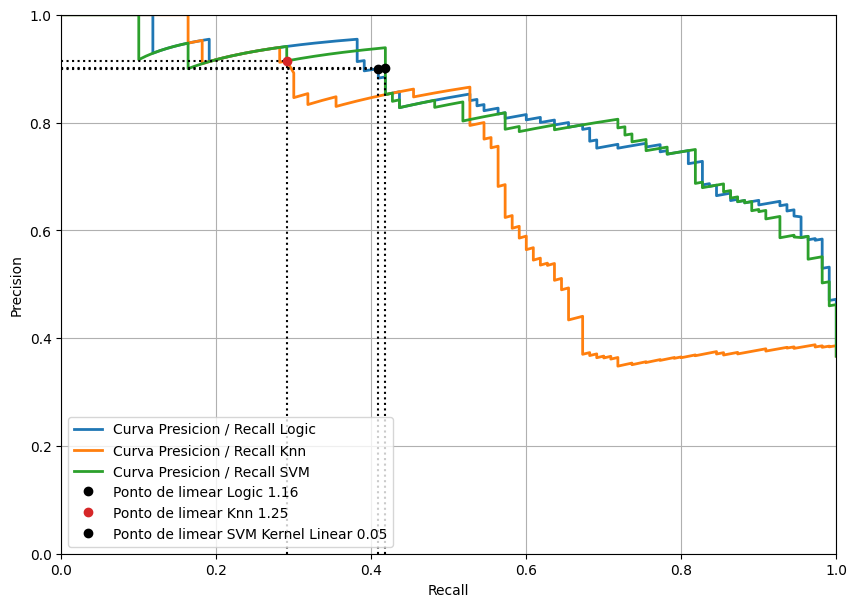

In [47]:
import matplotlib.patches as patches 

plt.figure(figsize = (10, 7))  
plt.plot(recalls_logic, precisions_logic, linewidth = 2, label = "Curva Presicion / Recall Logic")
plt.plot(recalls_neigh, precisions_neigh, linewidth = 2, label = "Curva Presicion / Recall Knn")
plt.plot(recalls_svm, precisions_svm, linewidth = 2, label = "Curva Presicion / Recall SVM")

plt.plot([recalls_logic[idx_for_90_precision_logic], recalls_logic[idx_for_90_precision_logic]], [0., precisions_logic[idx_for_90_precision_logic]], "k:")
plt.plot([0.0, recalls_logic[idx_for_90_precision_logic]], [precisions_logic[idx_for_90_precision_logic], precisions_logic[idx_for_90_precision_logic]], "k:")
plt.plot([recalls_logic[idx_for_90_precision_logic]], [precisions_logic[idx_for_90_precision_logic]], "ko",
         label="Ponto de limear Logic 1.16")

plt.plot([recalls_neigh[idx_for_90_precision_neigh], recalls_neigh[idx_for_90_precision_neigh]], [0., precisions_neigh[idx_for_90_precision_neigh]], "k:")
plt.plot([0.0, recalls_neigh[idx_for_90_precision_neigh]], [precisions_neigh[idx_for_90_precision_neigh], precisions_neigh[idx_for_90_precision_neigh]], "k:")
plt.plot([recalls_neigh[idx_for_90_precision_neigh]], [precisions_neigh[idx_for_90_precision_neigh]], "o",
         label="Ponto de limear Knn 1.25")

plt.plot([recalls_svm[idx_for_90_precision_svm], recalls_svm[idx_for_90_precision_svm]], [0., precisions_svm[idx_for_90_precision_svm]], "k:")
plt.plot([0.0, recalls_svm[idx_for_90_precision_svm]], [precisions_svm[idx_for_90_precision_svm], precisions_svm[idx_for_90_precision_svm]], "k:")
plt.plot([recalls_svm[idx_for_90_precision_svm]], [precisions_svm[idx_for_90_precision_svm]], "ko",
         label="Ponto de limear SVM Kernel Linear 0.05")


#plt.gca().add_patch(patches.FancyArrowPatch(
#    (0.79, 0.60), (0.61, 0.78),
#    connectionstyle="arc3, rad=.2",
#    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
#    color="#444444"))
# plt.text(0.56, 0.62, "Limite\n Mais Alto", color="#333333")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
# save_fig("precision_vs_recall_plot")
plt.show()

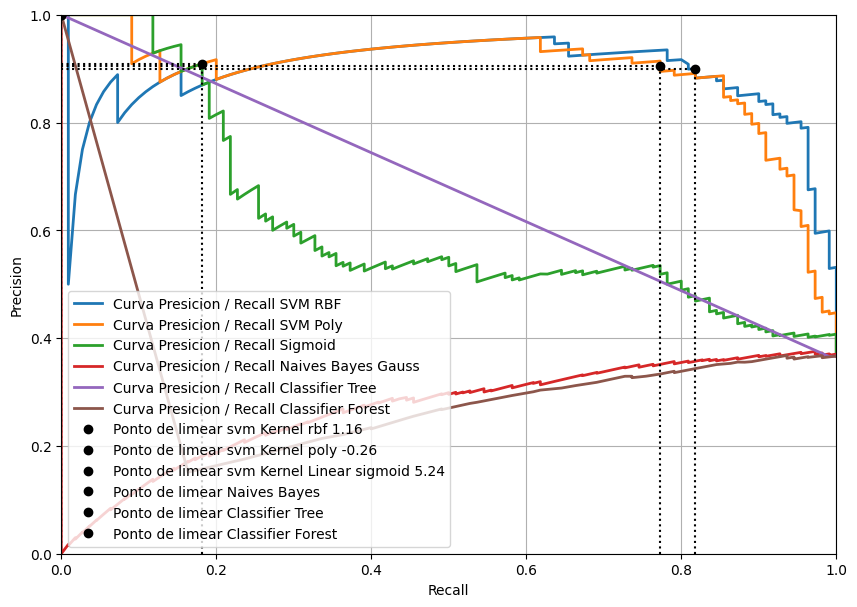

In [48]:
plt.figure(figsize = (10, 7))  

plt.plot(recalls_svm_rbf, precisions_svm_rbf, linewidth = 2, label = "Curva Presicion / Recall SVM RBF")
plt.plot(recalls_svm_poly, precisions_svm_poly, linewidth = 2, label = "Curva Presicion / Recall SVM Poly")
plt.plot(recalls_svm_sigmoid, precisions_svm_sigmoid, linewidth = 2, label = "Curva Presicion / Recall Sigmoid")
plt.plot(recalls_bayes, precisions_bayes, linewidth = 2, label = "Curva Presicion / Recall Naives Bayes Gauss")
plt.plot(recalls_dtree, precisions_dtree, linewidth = 2, label = "Curva Presicion / Recall Classifier Tree")
plt.plot(recalls_forest, precisions_forest, linewidth = 2, label = "Curva Presicion / Recall Classifier Forest")

plt.plot([recalls_svm_rbf[idx_for_90_precision_svm_rbf], recalls_svm_rbf[idx_for_90_precision_svm_rbf]], [0., precisions_svm_rbf[idx_for_90_precision_svm_rbf]], "k:")
plt.plot([0.0, recalls_svm_rbf[idx_for_90_precision_svm_rbf]], [precisions_svm_rbf[idx_for_90_precision_svm_rbf], precisions_svm_rbf[idx_for_90_precision_svm_rbf]], "k:")
plt.plot([recalls_svm_rbf[idx_for_90_precision_svm_rbf]], [precisions_svm_rbf[idx_for_90_precision_svm_rbf]], "ko",
         label="Ponto de limear svm Kernel rbf 1.16")

plt.plot([recalls_svm_poly[idx_for_90_precision_svm_poly], recalls_svm_poly[idx_for_90_precision_svm_poly]], [0., precisions_svm_poly[idx_for_90_precision_svm_poly]], "k:")
plt.plot([0.0, recalls_svm_poly[idx_for_90_precision_svm_poly]], [precisions_svm_poly[idx_for_90_precision_svm_poly], precisions_svm_poly[idx_for_90_precision_svm_poly]], "k:")
plt.plot([recalls_svm_poly[idx_for_90_precision_svm_poly]], [precisions_svm_poly[idx_for_90_precision_svm_poly]], "ko",
         label="Ponto de limear svm Kernel poly -0.26")

plt.plot([recalls_svm_sigmoid[idx_for_90_precision_svm_sigmoid], recalls_svm_sigmoid[idx_for_90_precision_svm_sigmoid]], [0., precisions_svm_sigmoid[idx_for_90_precision_svm_sigmoid]], "k:")
plt.plot([0.0, recalls_svm_sigmoid[idx_for_90_precision_svm_sigmoid]], [precisions_svm_sigmoid[idx_for_90_precision_svm_sigmoid], precisions_svm_sigmoid[idx_for_90_precision_svm_sigmoid]], "k:")
plt.plot([recalls_svm_sigmoid[idx_for_90_precision_svm_sigmoid]], [precisions_svm_sigmoid[idx_for_90_precision_svm_sigmoid]], "ko",
         label="Ponto de limear svm Kernel Linear sigmoid 5.24")

plt.plot([recalls_bayes[idx_for_90_precision_bayes], recalls_bayes[idx_for_90_precision_bayes]], [0., precisions_bayes[idx_for_90_precision_bayes]], "k:")
plt.plot([0.0, recalls_bayes[idx_for_90_precision_bayes]], [precisions_bayes[idx_for_90_precision_bayes], precisions_bayes[idx_for_90_precision_bayes]], "k:")
plt.plot([recalls_bayes[idx_for_90_precision_bayes]], [precisions_bayes[idx_for_90_precision_bayes]], "ko",
         label="Ponto de limear Naives Bayes")

plt.plot([recalls_dtree[idx_for_90_precision_dtree], recalls_dtree[idx_for_90_precision_dtree]], [0., precisions_dtree[idx_for_90_precision_dtree]], "k:")
plt.plot([0.0, recalls_dtree[idx_for_90_precision_dtree]], [precisions_dtree[idx_for_90_precision_dtree], precisions_dtree[idx_for_90_precision_dtree]], "k:")
plt.plot([recalls_dtree[idx_for_90_precision_dtree]], [precisions_dtree[idx_for_90_precision_dtree]], "ko",
         label="Ponto de limear Classifier Tree")

plt.plot([recalls_forest[idx_for_90_precision_forest], recalls_forest[idx_for_90_precision_forest]], [0., precisions_forest[idx_for_90_precision_forest]], "k:")
plt.plot([0.0, recalls_forest[idx_for_90_precision_forest]], [precisions_forest[idx_for_90_precision_forest], precisions_forest[idx_for_90_precision_forest]], "k:")
plt.plot([recalls_forest[idx_for_90_precision_forest]], [precisions_forest[idx_for_90_precision_forest]], "ko",
         label="Ponto de limear Classifier Forest")


#plt.gca().add_patch(patches.FancyArrowPatch(
#    (0.79, 0.60), (0.61, 0.78),
#    connectionstyle="arc3, rad=.2",
#    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
#    color="#444444"))
# plt.text(0.56, 0.62, "Limite\n Mais Alto", color="#333333")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
# save_fig("precision_vs_recall_plot")
plt.show()

- Um bom classificador fica mais próximo do canto superior direito. Neste caso o classificador SVM Kernel RBF é melhor do que os demais, mas tem espaços para melhoras. 

In [49]:
print("F1_score Modelo Logic:", f1_score(y_train_copy, y_train_pred_logic).round(2))
print("F1_score Modelo Knn:", f1_score(y_train_copy, y_train_pred_neigh).round(2))
print("F1_score Modelo SVM Kernel Linear:", f1_score(y_train_copy, y_train_pred_svm).round(2))
print("F1_score Modelo SVM Kernel rbf:", f1_score(y_train_copy, y_train_pred_svm_rbf).round(2))
print("F1_score Modelo SVM Kernel poly:", f1_score(y_train_copy, y_train_pred_svm_poly).round(2))
print("F1_score Modelo SVM Kernel sigmoid:", f1_score(y_train_copy, y_train_pred_svm_sigmoid).round(2))
print("F1_score Modelo Naves Bayes Gauss:", f1_score(y_train_copy, y_train_pred_bayes_gauss).round(2))
print("F1_score Modelo Random Forest:", f1_score(y_train_copy, y_train_pred_forest).round(2))

F1_score Modelo Logic: 0.74
F1_score Modelo Knn: 0.85
F1_score Modelo SVM Kernel Linear: 0.75
F1_score Modelo SVM Kernel rbf: 0.87
F1_score Modelo SVM Kernel poly: 0.81
F1_score Modelo SVM Kernel sigmoid: 0.52
F1_score Modelo Naves Bayes Gauss: 0.8
F1_score Modelo Random Forest: 0.87


In [50]:
# Cruva ROC
from sklearn.metrics import roc_curve
fpr_logic, tpr_logic, thresholds_logic = roc_curve(y_train_encod, y_scores_logic)
fpr_neigh, tpr_neigh, thresholds_neigh = roc_curve(y_train_encod, y_scores_neigh)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_train_encod, y_scores_svm)
fpr_svm_rbf, tpr_svm_rbf, thresholds_svm_rbf = roc_curve(y_train_encod, y_scores_svm_rbf)
fpr_svm_poly, tpr_svm_poly, thresholds_svm_poly = roc_curve(y_train_encod, y_scores_svm_poly)
fpr_svm_sigmoid, tpr_svm_sigmoid, thresholds_svm_sigmoid = roc_curve(y_train_encod, y_scores_svm_sigmoid)
fpr_bayes, tpr_bayes, thresholds_bayes = roc_curve(y_train_encod, y_scores_bayes_gauss)
fpr_dtree, tpr_dtree, thresholds_dtree = roc_curve(y_train_encod, y_scores_dtree.max(axis = 1))
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_encod, y_scores_forest.max(axis = 1))

In [51]:
idx_for_threshold_at_90_logic = (thresholds_logic <= threshold_for_90_precision_logic).argmax()
tpr_90_logic, fpr_90_logic = tpr_logic[idx_for_threshold_at_90_logic], fpr_logic[idx_for_threshold_at_90_logic]

idx_for_threshold_at_90_neigh = (thresholds_neigh <= threshold_for_90_precision_neigh).argmax()
tpr_90_neigh, fpr_90_neigh = tpr_neigh[idx_for_threshold_at_90_neigh], fpr_neigh[idx_for_threshold_at_90_neigh]

idx_for_threshold_at_90_svm = (thresholds_svm <= threshold_for_90_precision_svm).argmax()
tpr_90_svm, fpr_90_svm = tpr_svm[idx_for_threshold_at_90_svm], fpr_svm[idx_for_threshold_at_90_svm]

idx_for_threshold_at_90_svm_rbf = (thresholds_svm_rbf <= threshold_for_90_precision_svm_rbf).argmax()
tpr_90_svm_rbf, fpr_90_svm_rbf = tpr_svm_rbf[idx_for_threshold_at_90_svm_rbf], fpr_svm_rbf[idx_for_threshold_at_90_svm_rbf]

idx_for_threshold_at_90_svm_poly = (thresholds_svm_poly <= threshold_for_90_precision_svm_poly).argmax()
tpr_90_svm_poly, fpr_90_svm_poly = tpr_svm_poly[idx_for_threshold_at_90_svm_poly], fpr_svm_poly[idx_for_threshold_at_90_svm_poly]

idx_for_threshold_at_90_svm_sigmoid = (thresholds_svm_sigmoid <= threshold_for_90_precision_svm_sigmoid).argmax()
tpr_90_svm_sigmoid, fpr_90_svm_sigmoid = tpr_svm_sigmoid[idx_for_threshold_at_90_svm_sigmoid], fpr_svm_sigmoid[idx_for_threshold_at_90_svm_sigmoid]

idx_for_threshold_at_90_bayes = (thresholds_bayes <= threshold_for_90_precision_bayes).argmax()
tpr_90_bayes, fpr_90_bayes = tpr_bayes[idx_for_threshold_at_90_bayes], fpr_bayes[idx_for_threshold_at_90_bayes]

idx_for_threshold_at_90_dtree = (thresholds_dtree <= threshold_for_90_precision_dtree).argmax()
tpr_90_dtree, fpr_90_dtree = tpr_dtree[idx_for_threshold_at_90_dtree], fpr_dtree[idx_for_threshold_at_90_dtree]

idx_for_threshold_at_90_forest = (thresholds_forest <= threshold_for_90_precision_forest).argmax()
tpr_90_forest, fpr_90_forest = tpr_forest[idx_for_threshold_at_90_forest], fpr_forest[idx_for_threshold_at_90_forest]



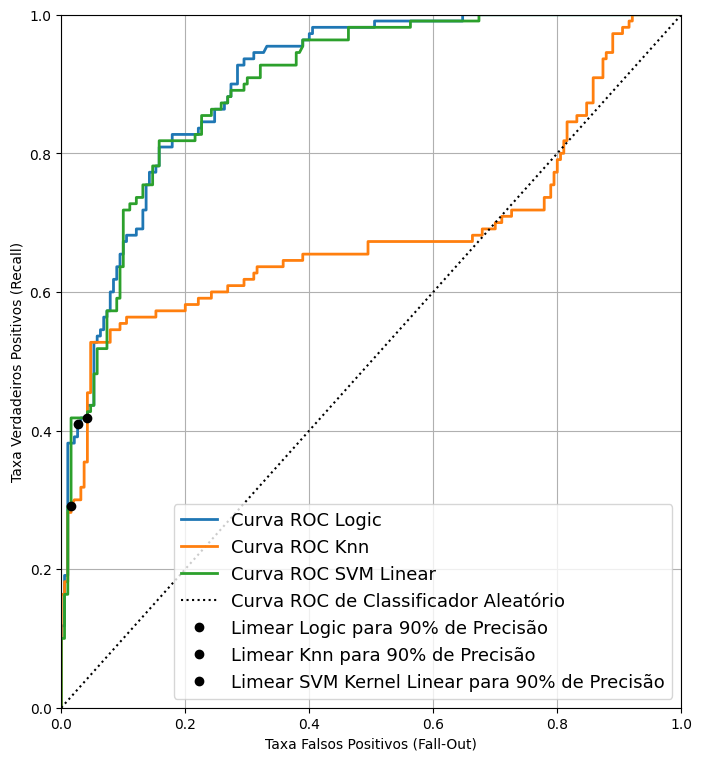

In [52]:
plt.figure(figsize=(8, 9)) 
plt.plot(fpr_logic, tpr_logic, linewidth=2, label="Curva ROC Logic")
plt.plot(fpr_neigh, tpr_neigh, linewidth=2, label="Curva ROC Knn")
plt.plot(fpr_svm, tpr_svm, linewidth=2, label="Curva ROC SVM Linear")

plt.plot([0, 1], [0, 1], 'k:', label="Curva ROC de Classificador Aleatório")

plt.plot([fpr_90_logic], [tpr_90_logic], "ko", label="Limear Logic para 90% de Precisão")
plt.plot([fpr_90_neigh], [tpr_90_neigh], "ko", label="Limear Knn para 90% de Precisão")
plt.plot([fpr_90_svm], [tpr_90_svm], "ko", label="Limear SVM Kernel Linear para 90% de Precisão")

# plt.gca().add_patch(patches.FancyArrowPatch(
#    (0.20, 0.89), (0.07, 0.70),
#    connectionstyle="arc3, rad=.4",
#    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
#    color="#444444"))
# plt.text(0.01, 0.9, "Limear \n Mais Alto", color="#333333")

plt.xlabel('Taxa Falsos Positivos (Fall-Out)')
plt.ylabel('Taxa Verdadeiros Positivos (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

# save_fig("roc_curve_plot")

plt.show()

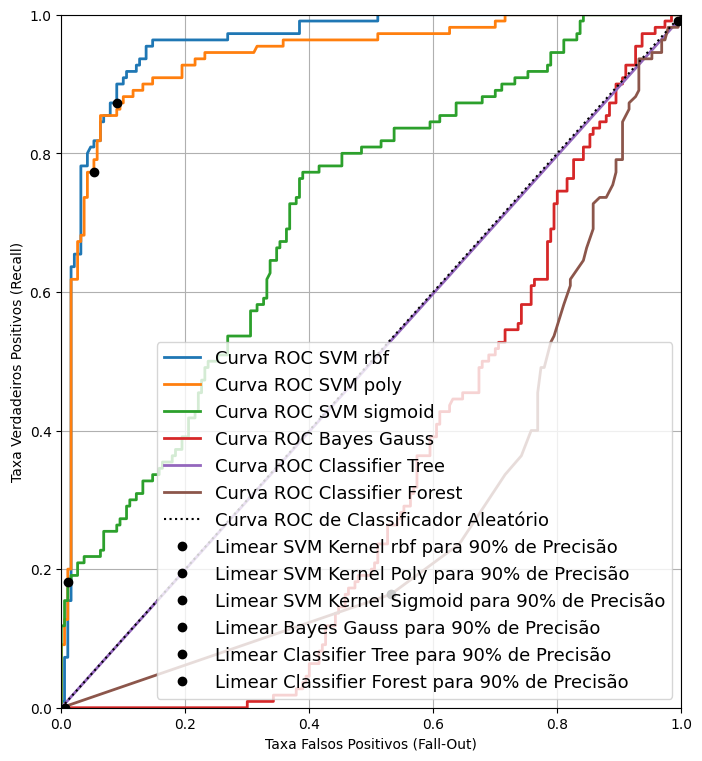

In [53]:
plt.figure(figsize=(8, 9)) 
plt.plot(fpr_svm_rbf, tpr_svm_rbf, linewidth=2, label="Curva ROC SVM rbf")
plt.plot(fpr_svm_poly, tpr_svm_poly, linewidth=2, label="Curva ROC SVM poly")
plt.plot(fpr_svm_sigmoid, tpr_svm_sigmoid, linewidth=2, label="Curva ROC SVM sigmoid")
plt.plot(fpr_bayes, tpr_bayes, linewidth=2, label="Curva ROC Bayes Gauss ")
plt.plot(fpr_dtree, tpr_dtree, linewidth=2, label="Curva ROC Classifier Tree ")
plt.plot(fpr_forest, tpr_forest, linewidth=2, label="Curva ROC Classifier Forest ")

plt.plot([0, 1], [0, 1], 'k:', label="Curva ROC de Classificador Aleatório")

plt.plot([fpr_90_svm_rbf], [tpr_90_svm_rbf], "ko", label="Limear SVM Kernel rbf para 90% de Precisão")
plt.plot([fpr_90_svm_poly], [tpr_90_svm_poly], "ko", label="Limear SVM Kernel Poly para 90% de Precisão")
plt.plot([fpr_90_svm_sigmoid], [tpr_90_svm_sigmoid], "ko", label="Limear SVM Kernel Sigmoid para 90% de Precisão")
plt.plot([fpr_90_bayes], [tpr_90_bayes], "ko", label="Limear Bayes Gauss para 90% de Precisão")
plt.plot([fpr_90_dtree], [tpr_90_dtree], "ko", label="Limear Classifier Tree para 90% de Precisão")
plt.plot([fpr_90_forest], [tpr_90_forest], "ko", label="Limear Classifier Forest para 90% de Precisão")

# plt.gca().add_patch(patches.FancyArrowPatch(
#    (0.20, 0.89), (0.07, 0.70),
#    connectionstyle="arc3, rad=.4",
#    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
#    color="#444444"))
# plt.text(0.01, 0.9, "Limear \n Mais Alto", color="#333333")

plt.xlabel('Taxa Falsos Positivos (Fall-Out)')
plt.ylabel('Taxa Verdadeiros Positivos (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

# save_fig("roc_curve_plot")

plt.show()

In [54]:
# area de comparação curva ROC
from sklearn.metrics import roc_auc_score
print("AUC do modelo Logic:", roc_auc_score(y_train_encod, y_scores_logic).round(3))
print("AUC do modelo KNN:", roc_auc_score(y_train_encod, y_scores_neigh).round(3))
print("AUC do modelo SVM Kernel Linear:", roc_auc_score(y_train_encod, y_scores_svm).round(3))
print("AUC do modelo Naive Bayes:", roc_auc_score(y_train_encod, y_scores_bayes_gauss).round(3))
print("AUC do modelo Classifier Tree:", roc_auc_score(y_train_encod, y_scores_dtree.max(axis = 1)).round(3))
print("AUC do modelo Classifier Forest:", roc_auc_score(y_train_encod, y_scores_forest.max(axis = 1)).round(3))

AUC do modelo Logic: 0.901
AUC do modelo KNN: 0.683
AUC do modelo SVM Kernel Linear: 0.896
AUC do modelo Naive Bayes: 0.327
AUC do modelo Classifier Tree: 0.498
AUC do modelo Classifier Forest: 0.282


- Um bom classificador fica o mais longe possível da linha pontilhada (em direção ao canto superior esquerdo).

- Uma maneira de comparar classificadores é medir a área sob a curva (AUC). Um classificador perfeito terá um ROC AUC igual a $1$, enquanto um classificador puramente aleatório terá um ROC AUC igual a $0.5$.

- Neste caso, o classificador SMV Kernel RBF é melhor do que o Logic e Knn, porém tem espaço para melhora. 